# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [ ]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-02 20:37:00--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0.002s  

2025-04-02 20:37:01 (6.72 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [ ]:
# Mostrar las primeras filas
df = pd.read_csv('Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

User ID Identificador único del usuario.

Relevancia: No aporta información predictiva, pero puede usarse para seguimiento individual. Generalmente se excluye en modelos de ML.

Gender (Género) Variable categórica (Male/Female) que indica el género del usuario.

Relevancia: Puede ser útil si existen diferencias en el comportamiento de compra por género. Sin embargo, en muchos casos, el género no es un predictor fuerte y podría eliminarse para evitar sesgos.

Age (Edad) Variable numérica que representa la edad del usuario.

Relevancia: Muy relevante, ya que la edad suele correlacionarse con el comportamiento de compra (ejemplo: usuarios jóvenes vs. mayores pueden responder distinto a anuncios).

EstimatedSalary (Salario Estimado) Variable numérica que indica el ingreso estimado del usuario.

Relevancia: Importante, ya que el poder adquisitivo influye en la decisión de compra. Puede ser un predictor clave junto con la edad.

Purchased (Compró) Variable binaria (0 = No compró, 1 = Compró).

Relevancia: El objetivo del modelo sería predecir si un usuario comprará o no basándose en las demás variables.

## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

In [1]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribución de la variable Purchased', fontweight='bold')
plt.xlabel('Purchased (0 = No, 1 = Sí)', fontsize=10)
plt.ylabel('Cantidad de usuarios', fontsize=10)
plt.show()

NameError: name 'plt' is not defined

Las variable no estan baleanceadas, existe un sesgo hacia la clase mayoritaria:
El modelo puede aprender a predecir siempre la clase dominante (ejemplo: "No compró") para maximizar la precisión (accuracy), ignorando la clase minoritaria.

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

El gráfico de barras muestra la distribución de la variable objetivo "Purchased".  
Se observa un desequilibrio en las clases, con una mayor cantidad de usuarios que no compraron (clase 0) en comparación con aquellos que sí lo hicieron (clase 1). Impacto de un posible desbalance en la performance del modelo:
Un conjunto de datos desequilibrado puede llevar a que el modelo se sesgue hacia la clase mayoritaria.
Es decir, el modelo podría aprender a predecir la clase "No compró" con alta precisión simplemente porque es la más frecuente.
Como consecuencia, la precisión (accuracy) podría ser alta, pero el modelo no sería útil para identificar correctamente a los usuarios que sí compran (clase minoritaria).
Métricas como la precisión, la exhaustividad y el valor F1 ofrecen una imagen más completa del desempeño del modelo en presencia de desequilibrios, resultando mejores métricas que el accuracy.
El modelo tendrá una alta tasa de verdaderos negativos (predecir correctamente que no compraron) y baja tasa de verdaderos positivos (predecir correctamente que sí compraron).
En consecuencia, la capacidad predictiva del modelo para la clase minoritaria ("compró") será baja, y no será confiable para la toma de decisiones en relación con esa clase.
Concretamente, el modelo podría ser impreciso en predecir la clase minoritaria, afectando su utilidad para acciones de marketing dirigidas a ese segmento.

Estrategias para mitigar el desbalance:
1. Re-muestreo:
a. Sobremuestreo (Oversampling): Crear nuevas instancias sintéticas de la clase minoritaria para equilibrar las clases. SMOTE (Synthetic Minority Over-sampling Technique) es una técnica popular para esto.
b. Submuestreo (Undersampling): Eliminar instancias aleatorias de la clase mayoritaria para reducir su tamaño.
2. Técnicas de Costo: Asignar un mayor costo a los errores de clasificación de la clase minoritaria durante el entrenamiento, incentivando al modelo a prestar mayor atención a esta clase.
3. Algoritmos específicos: Utilizar algoritmos de aprendizaje automático que sean robustos ante datos desequilibrados, como los basados en boosting o Random Forests, con parámetros que favorecen el desempeño en la clase minoritaria.

En este caso específico, se recomienda aplicar alguna técnica de sobremuestreo como SMOTE para generar instancias sintéticas de la clase minoritaria y así balancear el conjunto de datos antes de entrenar el modelo.

También se deben evaluar otras métricas como precisión, exhaustividad (recall) y valor F1 para medir el rendimiento del modelo.


## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

Age y EstimatedSalary son relevantes porque:

Capturan factores socioeconómicos y demográficos vinculados al comportamiento de compra.

Son variables numéricas interpretables y procesables por modelos

Su combinación permite identificar segmentos de usuarios con alta propensión a comprar (ejemplo: profesionales con salarios altos).

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)


La estratificación es esencial en problemas de clasificación con desbalance, ya que:

Mantiene la integridad estadística de los datos.

Permite una evaluación justa del modelo.

Previene sesgos durante el entrenamiento.

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        64
           1       0.76      0.81      0.78        36

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



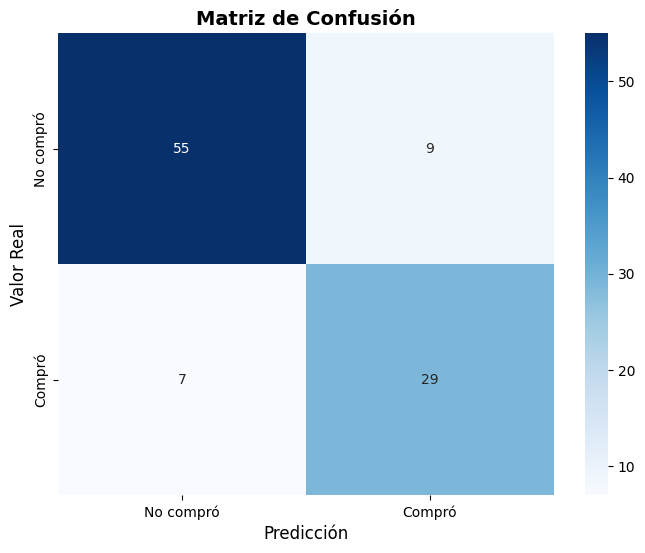

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No compró', 'Compró'],
            yticklabels=['No compró', 'Compró'])
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.show()


Falsos Positivos (FP)

Qué son: Usuarios que no compraron, pero el modelo predijo que sí.

Implicación:

Costo económico: Si el modelo se usa para campañas publicitarias, esto derivaría en gastos innecesarios (ejemplo: enviar descuentos a quienes no los usarán).

Falsos Negativos (FN)

Qué son: Usuarios que sí compraron, pero el modelo predijo que no.

Implicación:

Pérdida de oportunidades: No se atiende a clientes potencialmente valiosos.

Tasa de Error por Clase

Para la clase 0 (No compró): Errores = FP / (FP + TN).

Para la clase 1 (Compró): Errores = FN / (FN + TP).

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.82      0.86      0.84        36

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.88      0.88       100



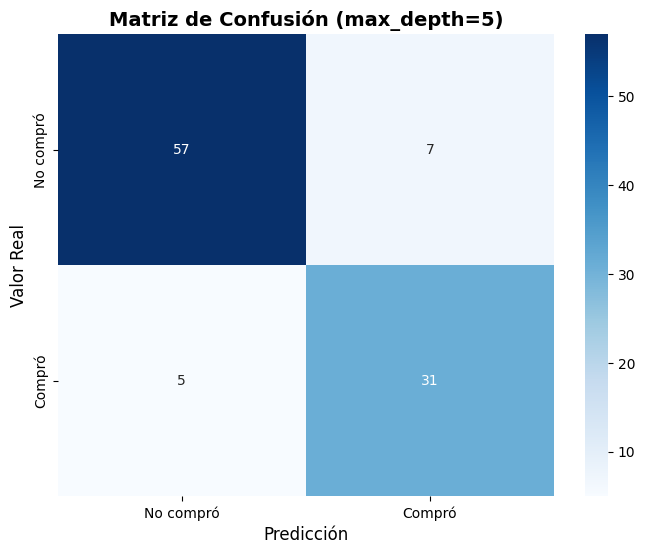

In [ ]:
classifier_depth5 = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
classifier_depth5.fit(X_train, y_train)
y_pred_depth5 = classifier_depth5.predict(X_test)

print(classification_report(y_test, y_pred_depth5))

cm_depth5 = confusion_matrix(y_test, y_pred_depth5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_depth5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No compró', 'Compró'],
            yticklabels=['No compró', 'Compró'])
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.title('Matriz de Confusión (max_depth=5)', fontsize=14, fontweight='bold')
plt.show()


In [ ]:

print("Métricas del modelo inicial:")
print(classification_report(y_test, y_pred))

print("\nMétricas del modelo con max_depth=5:")
print(classification_report(y_test, y_pred_depth5))

print("\nMatriz de confusión del modelo inicial:")
print(cm)
print("\nMatriz de confusión del modelo con max_depth=5:")
cm_depth5


Métricas del modelo inicial:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        64
           1       0.76      0.81      0.78        36

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100


Métricas del modelo con max_depth=5:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.82      0.86      0.84        36

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.88      0.88       100


Matriz de confusión del modelo inicial:
[[55  9]
 [ 7 29]]

Matriz de confusión del modelo con max_depth=5:


array([[57,  7],
       [ 5, 31]])

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?

El modelo con max_depth=5 generalmente ofrece un mejor balance.  Un árbol más profundo (el modelo inicial) puede ser más complejo y difícil de interpretar debido a su mayor cantidad de nodos y reglas de decisión.  Aunque potencialmente más preciso en el conjunto de entrenamiento, puede sobreajustarse.  El árbol más superficial (max_depth=5) es más simple y, por lo tanto, más fácil de entender, lo que facilita la explicación de las predicciones.  El equilibrio se encuentra en la capacidad del modelo ajustado para generalizar bien a datos nuevos, sacrificando algo de precisión en el conjunto de entrenamiento para mejorar la capacidad de predicción en el conjunto de prueba.

¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?

El modelo con max_depth=5 muestra indicios de un mejor comportamiento frente al sobreajuste.  Esto se puede observar comparando las métricas de rendimiento (precisión, recall, F1-score) entre los conjuntos de entrenamiento y prueba. Si las métricas en el conjunto de prueba son significativamente más bajas que en el de entrenamiento, esto sugiere sobreajuste.  El modelo con profundidad limitada generalmente tendrá métricas de rendimiento más cercanas entre ambos conjuntos, señalando una mejor capacidad para generalizar a datos no vistos previamente. Una diferencia menor entre las métricas de ambos conjuntos es un buen indicador.

¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

La Regresión Logística es un buen modelo de referencia para comparar el rendimiento.  Su simplicidad y solidez permiten tener una línea base para evaluar el Árbol de Decisión.  Otros modelos como SVM, KNN o Redes Neuronales también podrían usarse como puntos de comparación para determinar si el Árbol de Decisión es el modelo más adecuado para este problema.  Comparar el rendimiento del Árbol de decisión con estos modelos proporcionará una visión más completa de la eficacia del modelo y permitirá determinar si las características particulares del árbol de decisión ofrecen alguna ventaja en relación al problema. La comparación ayudaría a determinar si la complejidad añadida del Árbol de Decisión, con sus ventajas de interpretabilidad, ofrece alguna ventaja sobre modelos más simples.